In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.4.3/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
    Time, Begin_Time, Compl_Time, Peak_Time, Trop_Peak_Time = [], [], [], [], []
# Edit Time Format
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(10,60,5)
Lon_Bins = Create_Bins(-100,20,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
# Create Function to Plot ET Begin and Complete Locations
def Plot_ET_Locs(ET_DF, Model, i):
#
# Plot Peak Locations
    Axis = Fig.add_subplot(3,3,3*i+1, projection=ccrs.PlateCarree())
    Peak_Lons = ET_DF["Peak Lon"]
    Peak_Lats = ET_DF["Peak Lat"]
    for k in range(len(Peak_Lats)):
        pyplot.scatter(Peak_Lons[k], Peak_Lats[k], marker='*', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i)
    Title = Model + ": Storm Peak Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Begin Locations
    Axis = Fig.add_subplot(3,3,3*i+2, projection=ccrs.PlateCarree())
    Begin_Lons = ET_DF["ET Begin Lon"]
    Begin_Lats = ET_DF["ET Begin Lat"]
    for k in range(len(Begin_Lats)):
        pyplot.scatter(Begin_Lons[k], Begin_Lats[k], marker='s', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+1)
    Title = Model + ": ET Initiation Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Complete Data
    Axis = Fig.add_subplot(3,3,3*i+3, projection=ccrs.PlateCarree())
    Compl_Lons = ET_DF["ET Complete Lon"]
    Compl_Lats = ET_DF["ET Complete Lat"]
    for k in range(len(Compl_Lats)):
        pyplot.scatter(Compl_Lons[k], Compl_Lats[k], marker='^', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+2)
    Title = Model + ": ET Completion Locations"
    Axis.set_title(Title, fontsize=24)

In [9]:
def Plot_Map_Formatting(Axis, Plot):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min, x_Max, y_Min, y_Max = -100, 20, 10, 60
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    Letter_Label(Axis, Plot)

In [10]:
# Letter Labels
def Letter_Label(Axis, Plot):
    Fig_Labels = ['(a)','(b)','(c)','(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']
    Axis.text(0.05, 0.89, str(Fig_Labels[int(Plot)]), ha='center', va='center', \
    transform=Axis.transAxes, fontdict={'size':24},color='black')

In [11]:
Control_Data_SubsetA, Control_ET_SubsetA, Control_Codes = Files_Open("Control", Diri, "SubsetA")
RCP45_Data_SubsetA, RCP45_ET_SubsetA, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetA")
RCP85_Data_SubsetA, RCP85_ET_SubsetA, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetA")

In [12]:
print (len(Control_ET_SubsetA), len(RCP45_ET_SubsetA), len(RCP85_ET_SubsetA))

649 460 407


/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(


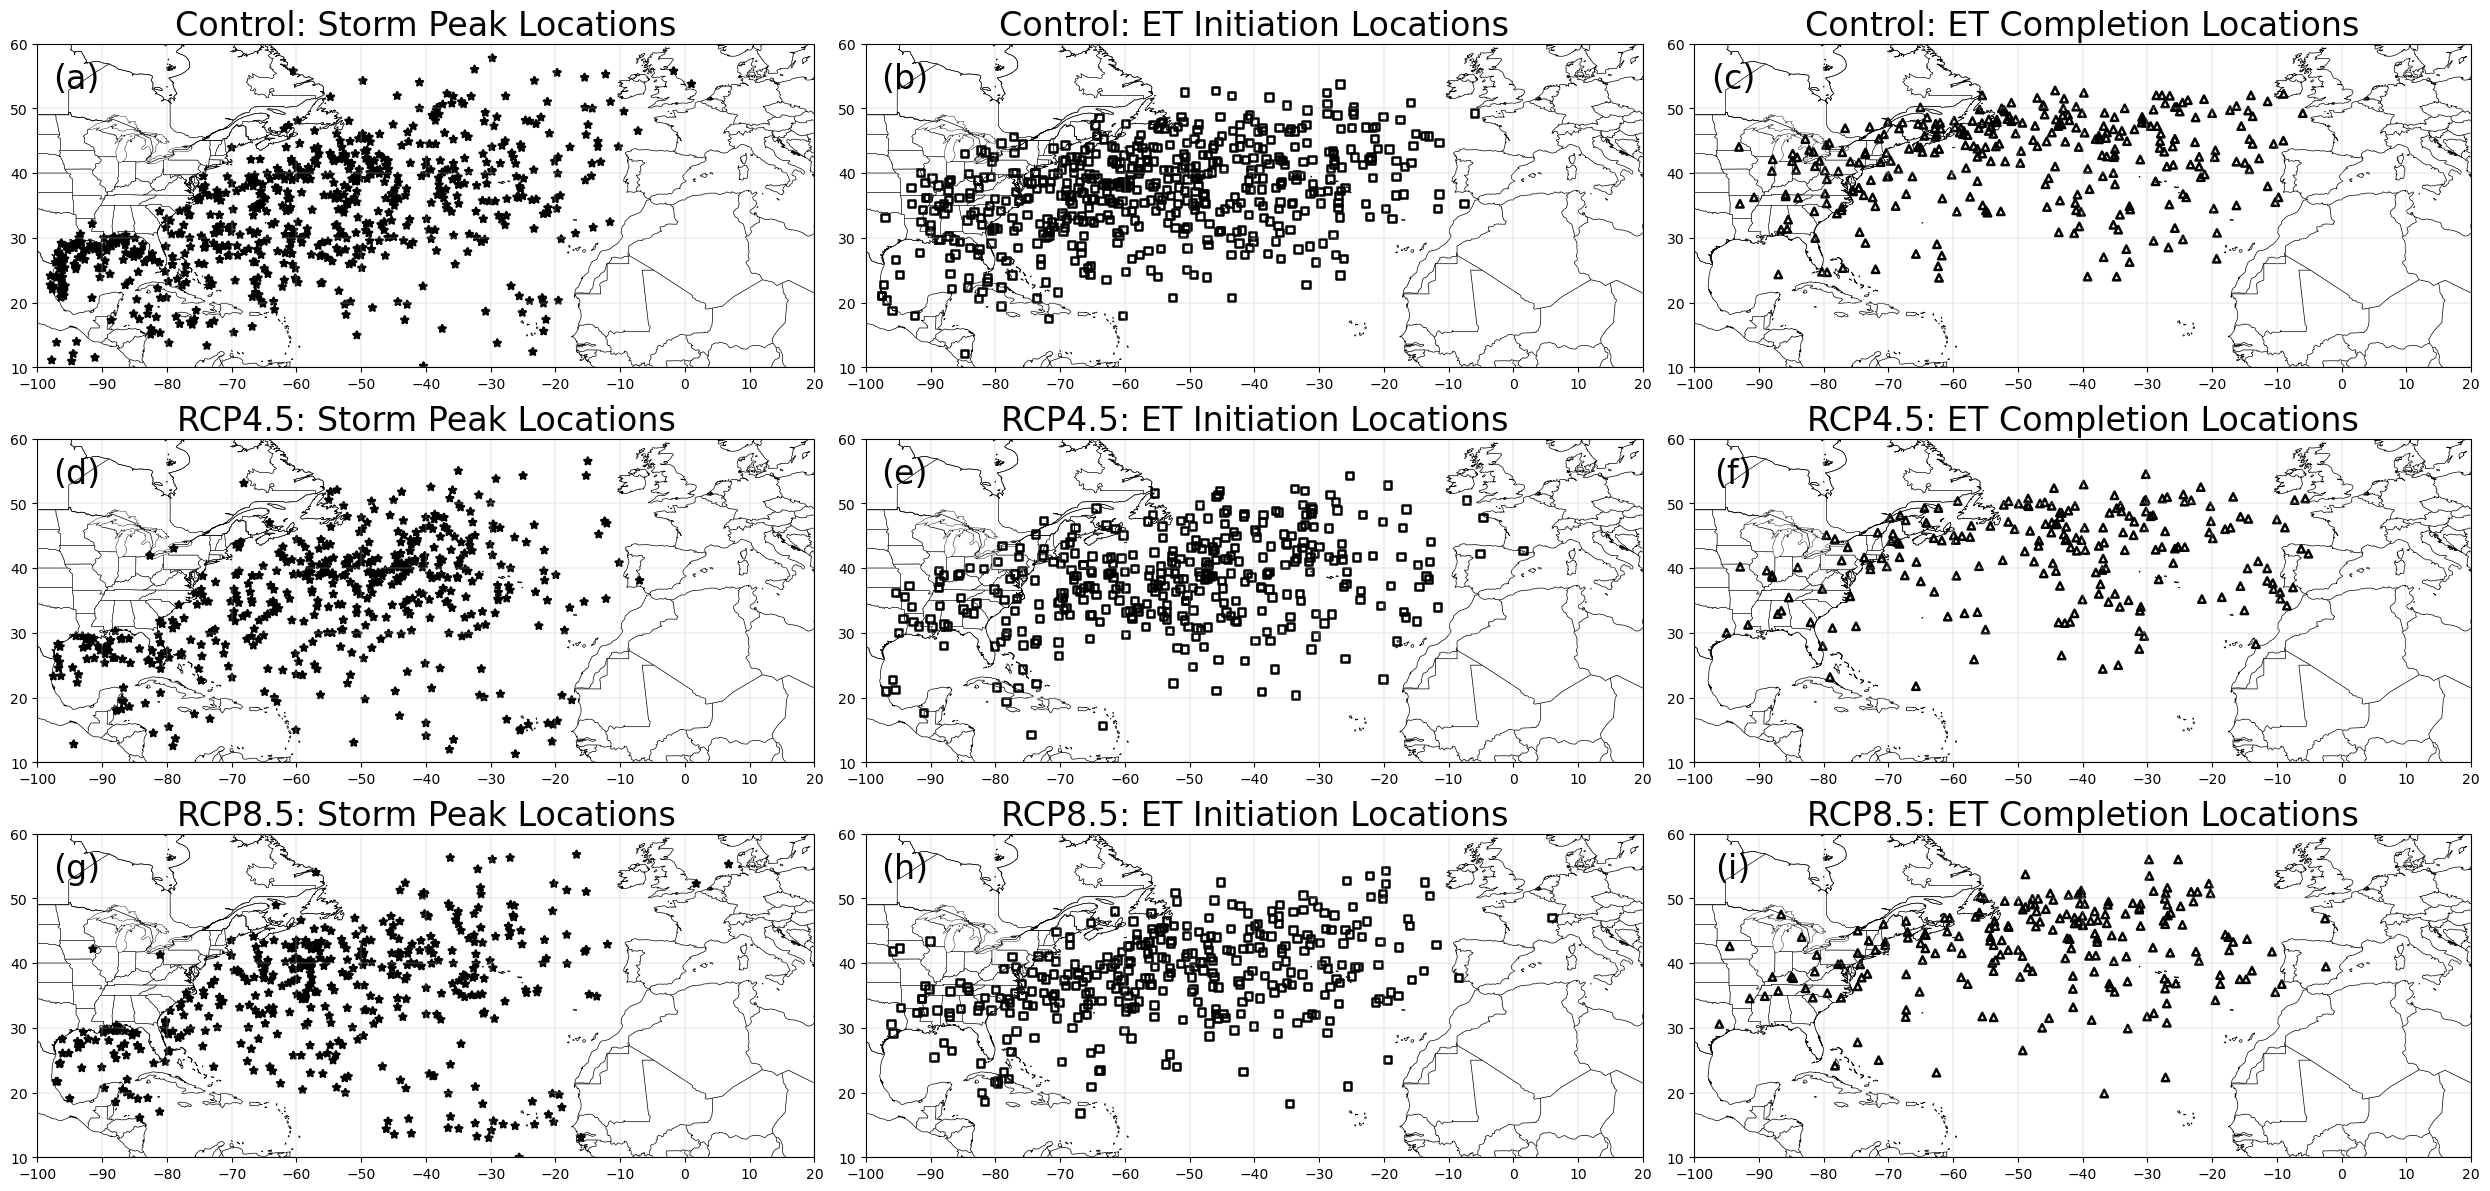

In [13]:
# Plot Storm Peak, ET Initiation and ET Completion Locations
Fig = pyplot.figure(figsize=(25,12))
Plot_ET_Locs(Control_ET_SubsetA, "Control", 0)
Plot_ET_Locs(RCP45_ET_SubsetA, "RCP4.5", 1)
Plot_ET_Locs(RCP85_ET_SubsetA, "RCP8.5", 2)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Loc_SubsetA.png', bbox_inches='tight')

In [14]:
Control_Data_SubsetB, Control_ET_SubsetB, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data_SubsetB, RCP45_ET_SubsetB, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data_SubsetB, RCP85_ET_SubsetB, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [15]:
print (len(Control_ET_SubsetB), len(RCP45_ET_SubsetB), len(RCP85_ET_SubsetB))

282 190 198


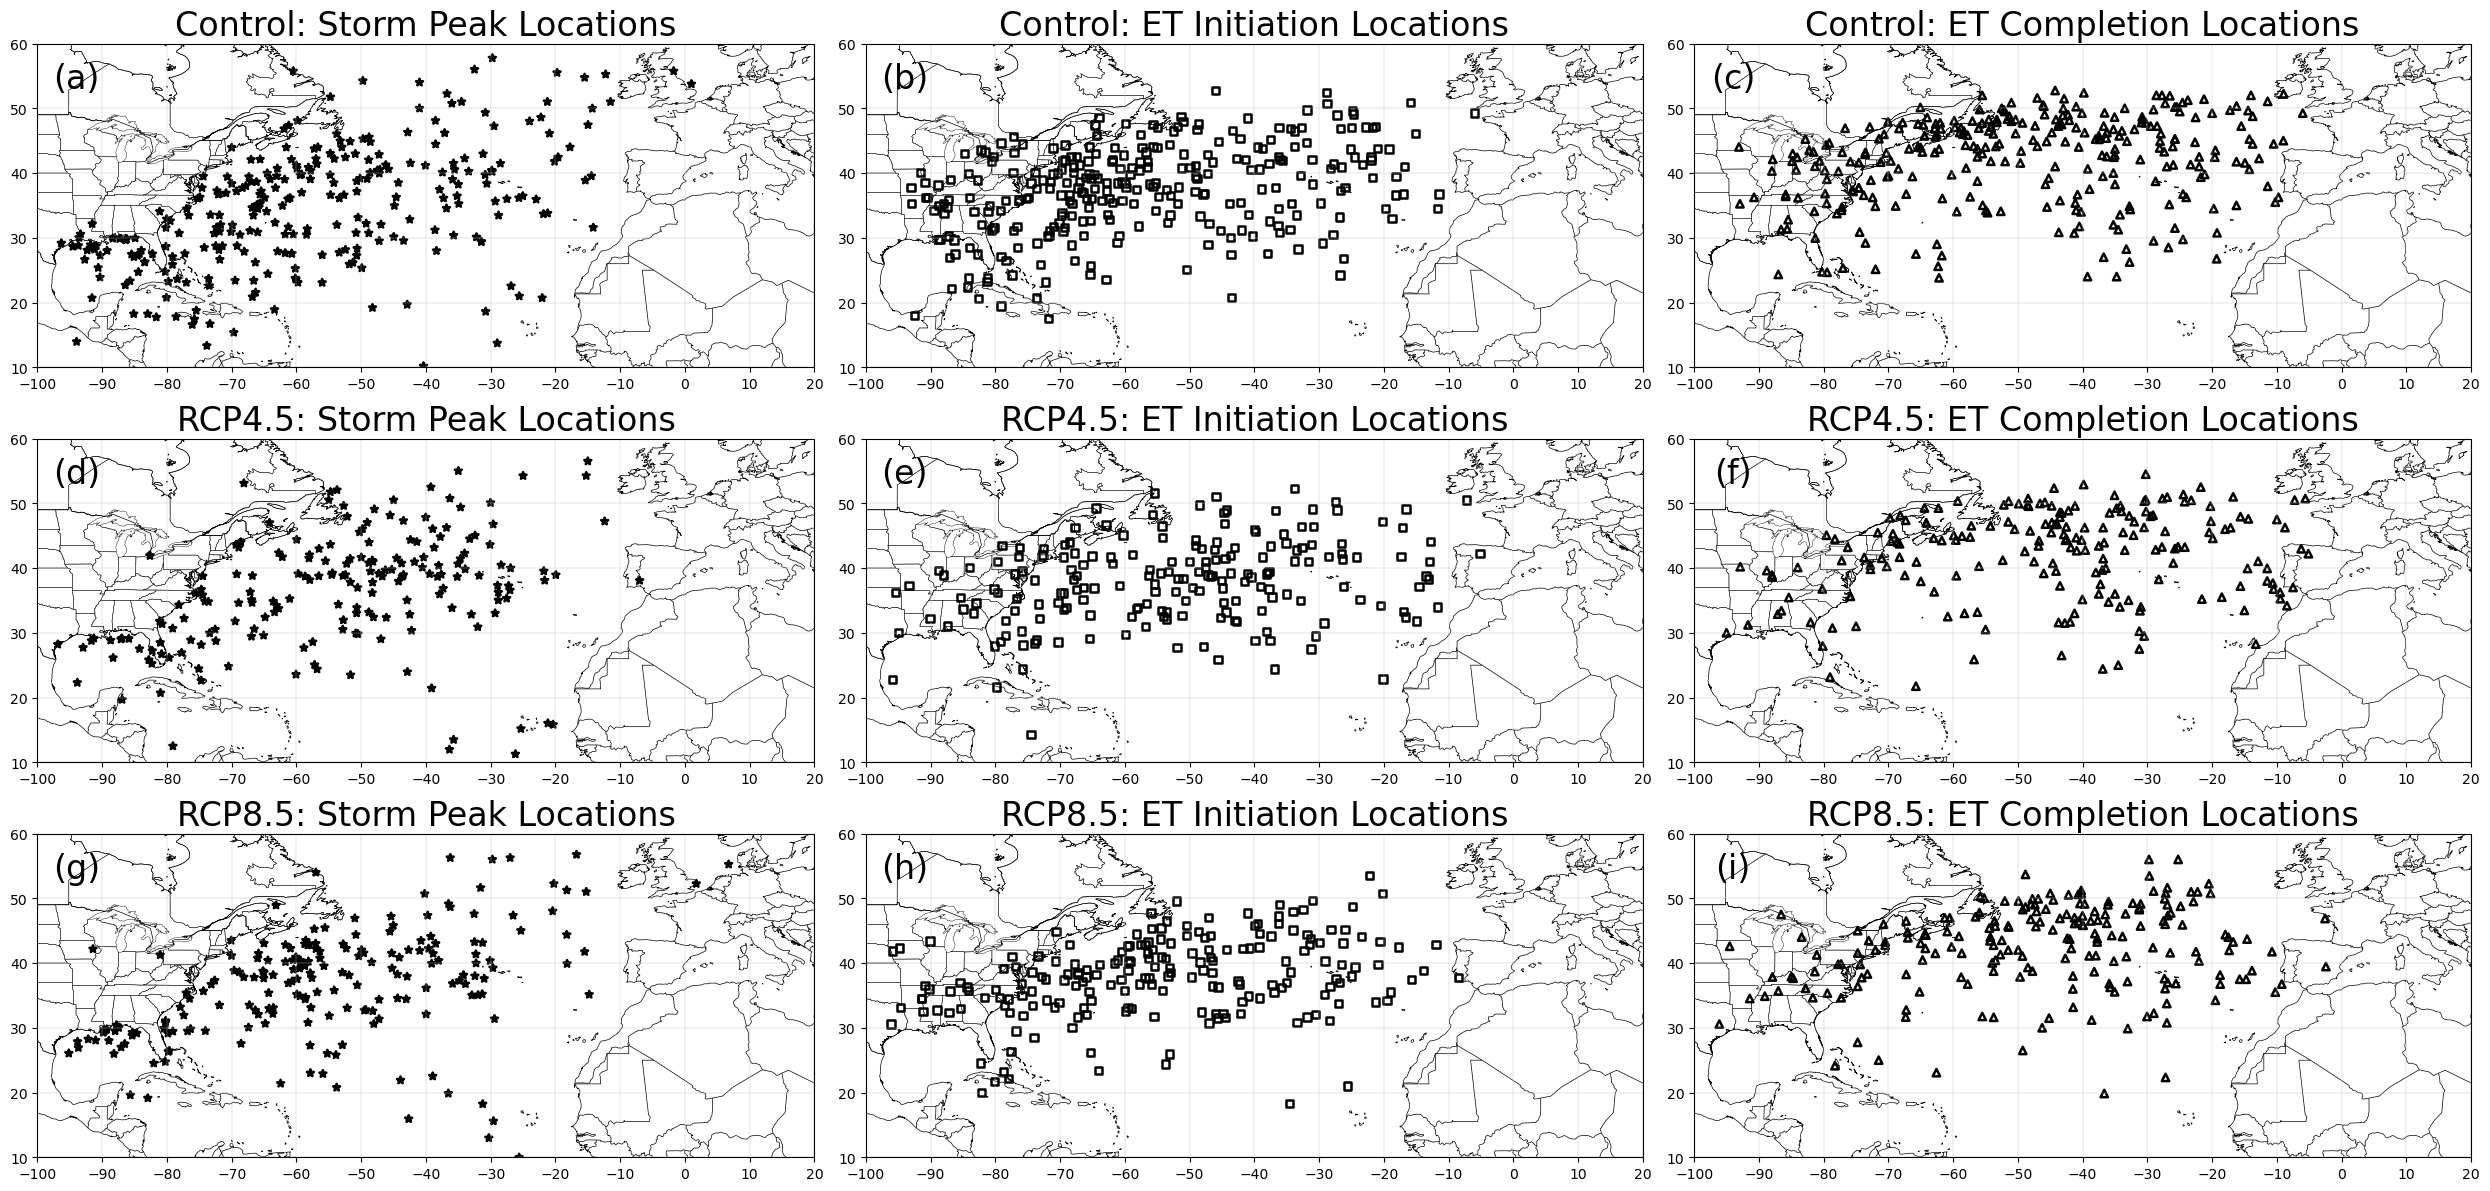

In [16]:
# Plot Storm Peak, ET Initiation and ET Completion Locations
Fig = pyplot.figure(figsize=(25,12))
Plot_ET_Locs(Control_ET_SubsetB, "Control", 0)
Plot_ET_Locs(RCP45_ET_SubsetB, "RCP4.5", 1)
Plot_ET_Locs(RCP85_ET_SubsetB, "RCP8.5", 2)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Loc_SubsetB.png', bbox_inches='tight')

In [17]:
Control_Data_SubsetC, Control_ET_SubsetC, Control_Codes = Files_Open("Control", Diri, "SubsetC")
RCP45_Data_SubsetC, RCP45_ET_SubsetC, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetC")
RCP85_Data_SubsetC, RCP85_ET_SubsetC, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetC")

In [18]:
print (len(Control_ET_SubsetC), len(RCP45_ET_SubsetC), len(RCP85_ET_SubsetC))

89 48 55


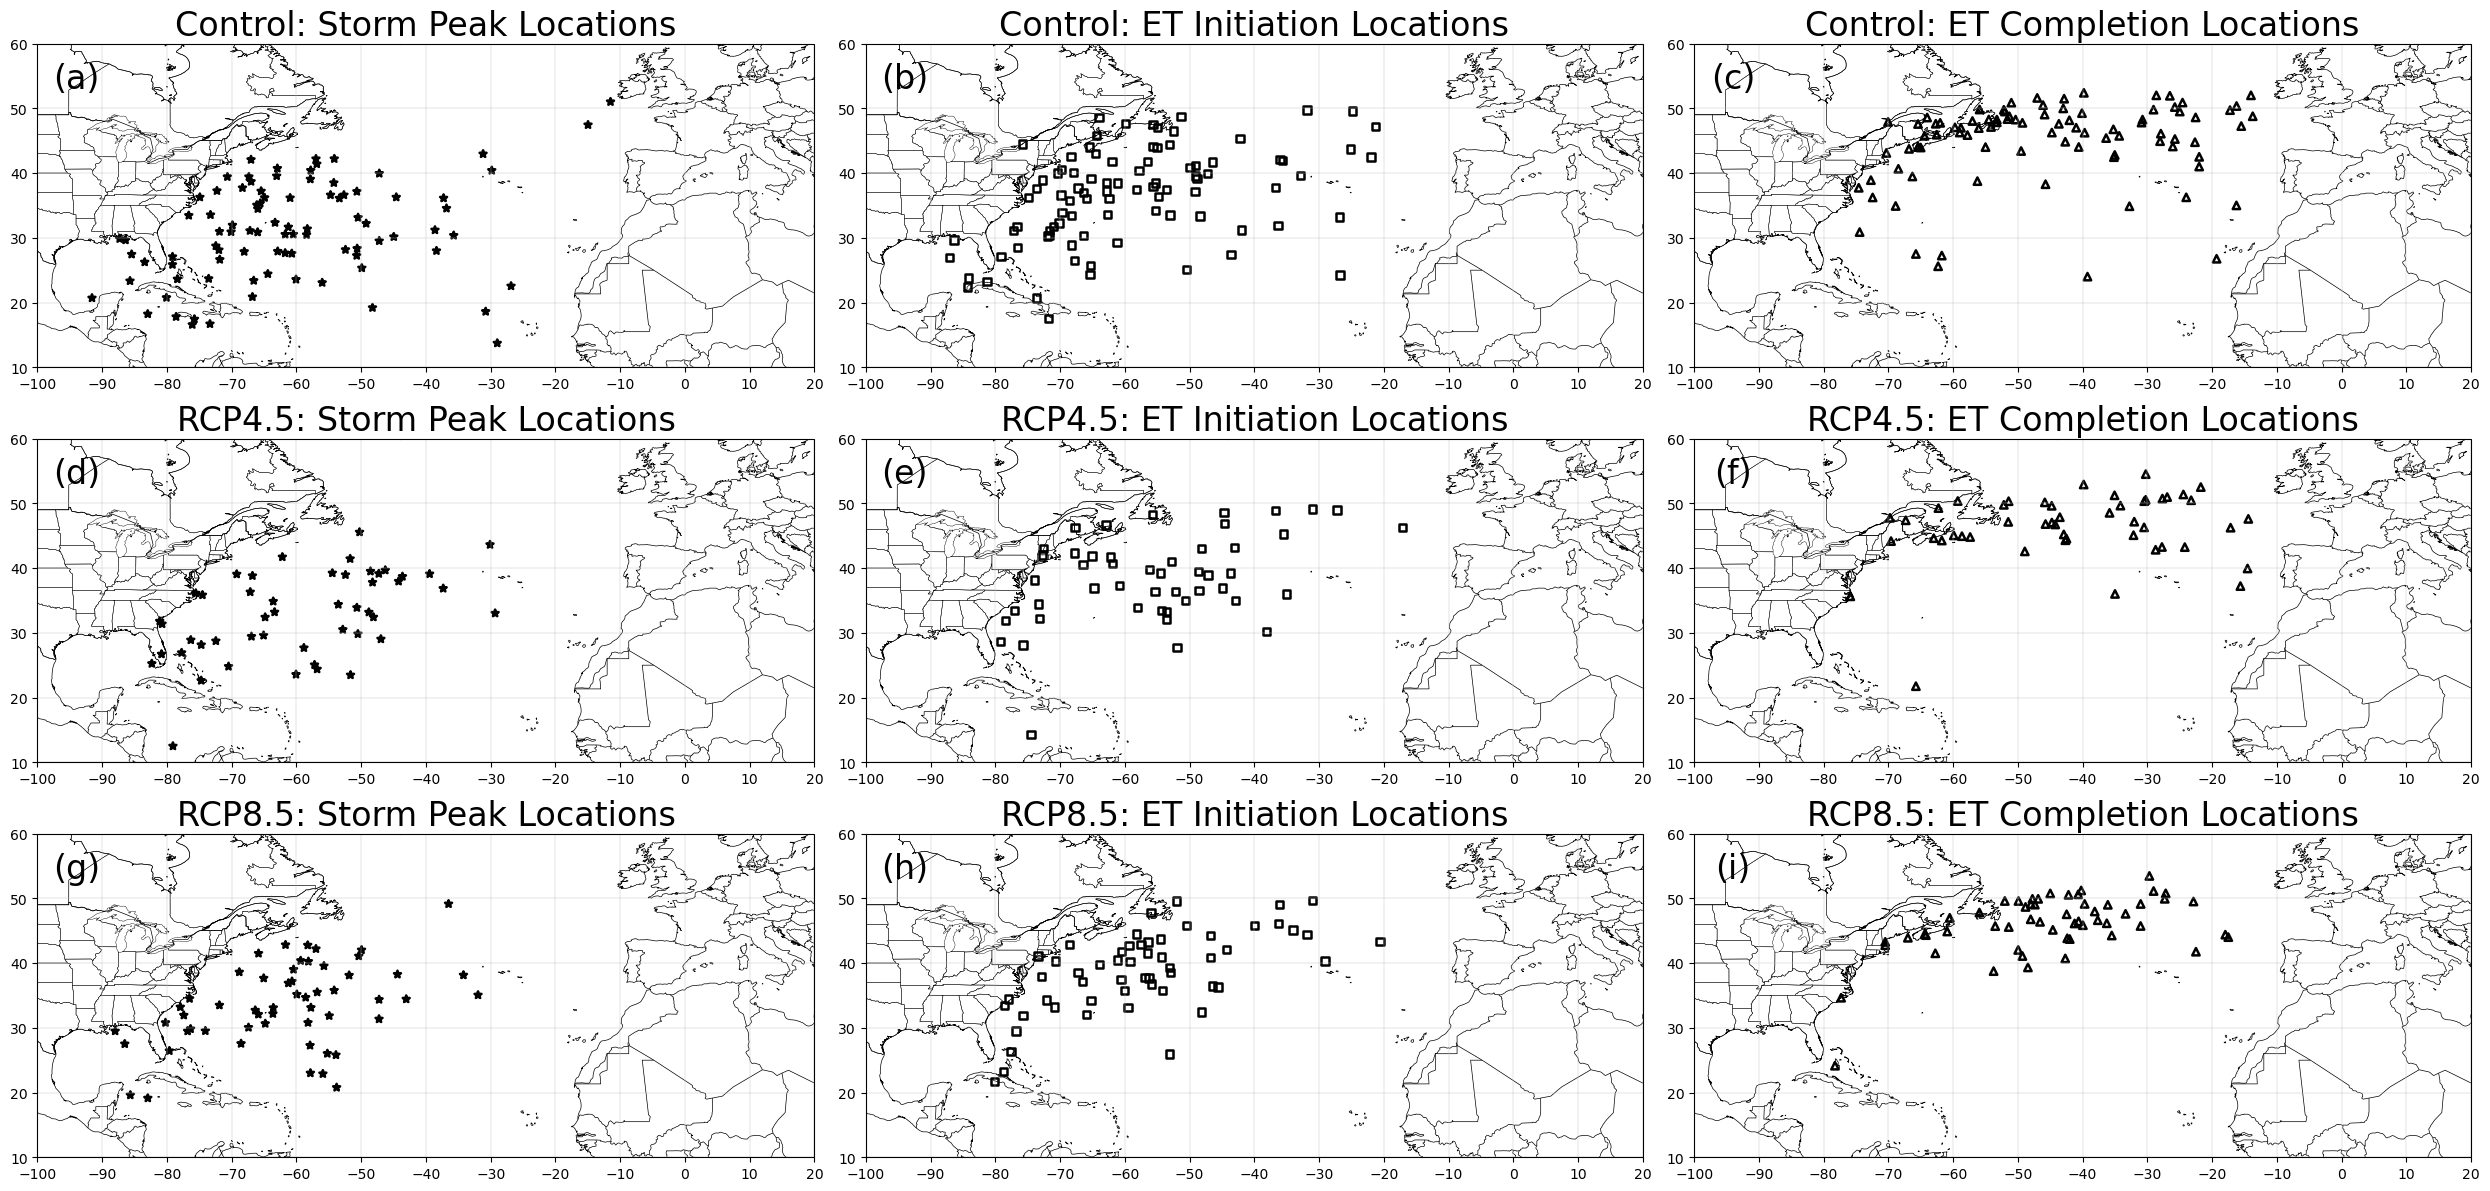

In [19]:
# Plot Storm Peak, ET Initiation and ET Completion Locations
Fig = pyplot.figure(figsize=(25,12))
Plot_ET_Locs(Control_ET_SubsetC, "Control", 0)
Plot_ET_Locs(RCP45_ET_SubsetC, "RCP4.5", 1)
Plot_ET_Locs(RCP85_ET_SubsetC, "RCP8.5", 2)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Loc_SubsetC.png', bbox_inches='tight')

In [20]:
# Create Function to Plot ET Begin and Complete Locations
def Plot_ET_Locs_2(ET_DF, Model, i, Begin):
#
# Plot ET Begin Locations
    if Begin == True:
        Axis = Fig.add_subplot(3,1,i+1, projection=ccrs.PlateCarree())
        Begin_Lons = ET_DF["ET Begin Lon"]
        Begin_Lats = ET_DF["ET Begin Lat"]
        for k in range(len(Begin_Lats)):
            pyplot.scatter(Begin_Lons[k], Begin_Lats[k], marker='s', linewidths=1.8, \
            facecolors='none', edgecolors='black', s=28)
        Plot_Map_Formatting(Axis, i)
        Title = Model + ": ET Initiation Locations"
        Axis.set_title(Title, fontsize=24)
#
# Plot ET Complete Data
    else:
        Axis = Fig.add_subplot(3,1,i+1, projection=ccrs.PlateCarree())
        Compl_Lons = ET_DF["ET Complete Lon"]
        Compl_Lats = ET_DF["ET Complete Lat"]
        for k in range(len(Compl_Lats)):
            pyplot.scatter(Compl_Lons[k], Compl_Lats[k], marker='^', linewidths=1.8, \
            facecolors='none', edgecolors='black', s=28)
        Plot_Map_Formatting(Axis, i)
        Title = Model + ": ET Completion Locations"
        Axis.set_title(Title, fontsize=24)

TypeError: Plot_Map_Formatting() missing 1 required positional argument: 'Plot'

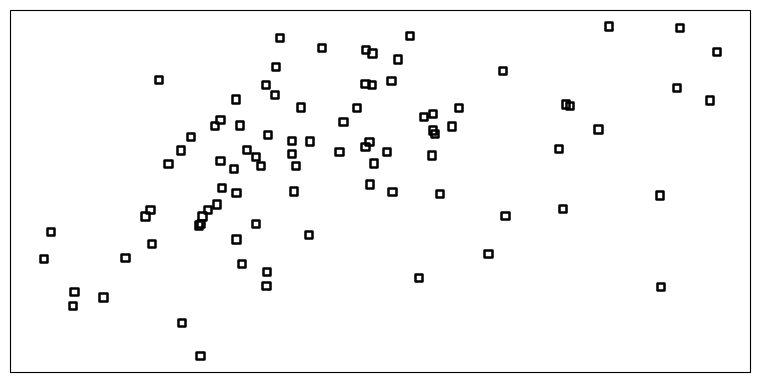

In [21]:
# Plot ET Initiation Locations
Fig = pyplot.figure(figsize=(12,16))
Plot_ET_Locs_2(Control_ET_SubsetC, "Control", 0, True)
Plot_ET_Locs_2(RCP45_ET_SubsetC, "RCP4.5", 1, True)
Plot_ET_Locs_2(RCP85_ET_SubsetC, "RCP8.5", 2, True)
Fig.tight_layout()

In [ ]:
# Plot ET Completion Locations
Fig = pyplot.figure(figsize=(12,16))
Plot_ET_Locs_2(Control_ET_SubsetC, "Control", 0, False)
Plot_ET_Locs_2(RCP45_ET_SubsetC, "RCP4.5", 1, False)
Plot_ET_Locs_2(RCP85_ET_SubsetC, "RCP8.5", 2, False)
Fig.tight_layout()

In [ ]:
# Plot Subset Boundary
Fig = pyplot.figure(figsize=(12,8))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines(linewidth=0.5)
Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
Axis.add_feature(cfeature.STATES, linewidth=0.3)
x_Min, x_Max, y_Min, y_Max = -90,-50,25,55
x_Axis = Create_Bins(x_Min, x_Max, 5)
y_Axis = Create_Bins(y_Min, y_Max, 5)
pyplot.xticks(x_Axis)
pyplot.yticks(y_Axis)
pyplot.xlim(x_Min,x_Max)
pyplot.ylim(y_Min,y_Max)
pyplot.grid(linewidth=0.3, color='silver', linestyle='-')
#
pyplot.plot(\
[-90,-83,-83,-81,-81,-78,-78,-76,-76,-72,-72,-68,-68,-62,-62], \
[31,31,34,34,36,36,40,40,45,45,49,49,52,52,55], c='red', linewidth=2.8)

In [ ]:
# Plot Subset Boundary
Fig = pyplot.figure(figsize=(12,8))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines(linewidth=0.5)
Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
Axis.add_feature(cfeature.STATES, linewidth=0.3)
x_Min, x_Max, y_Min, y_Max = -100,0,10,60
x_Axis = Create_Bins(x_Min, x_Max, 5)
y_Axis = Create_Bins(y_Min, y_Max, 5)
pyplot.xticks(x_Axis)
pyplot.yticks(y_Axis)
pyplot.xlim(x_Min,x_Max)
pyplot.ylim(y_Min,y_Max)
pyplot.grid(linewidth=0.3, color='silver', linestyle='-')
pyplot.plot(\
[-95,-83,-83,-81,-81,-78,-78,-76,-76,-72,-72,-68,-68,-62,-62,-12,-12,-18,-18,-83,-83,-88,-88,-95,-95], \
[31,31,34,34,36,36,40,40,45,45,49,49,52,52,60,60,30,30,10,10,16,16,20,20,31], c='red', linewidth=2.8)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Bounds_SubsetC.png', bbox_inches='tight')